# Compare Augmentation

In [ ]:
import os
import numpy as np
import keras
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
import zipfile
import shutil


# unzip file
zip_file_path = '/content/SOCOFing.zip'
extracted_path = 'extracted_socofing'

if not os.path.exists(extracted_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)

In [ ]:
import keras
from sklearn.metrics import roc_curve, auc

In [ ]:
baseline_model = keras.models.load_model("baseline_resnet50.keras")
augmented_model = keras.models.load_model("augmented_resnet50.keras")

In [ ]:
import importlib
import data_utils
import os
import tensorflow as tf
import numpy as np

importlib.reload(data_utils)

organized_dataset_path = 'organized_fingerprint_dataset'
test_dir = os.path.join(organized_dataset_path, 'test')

image_size = (224, 224)
batch_size = 10

_, test_ds, class_names = data_utils.create_image_datasets(
    test_dir,
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle_train=False,
    shuffle_test=False
)

AUTOTUNE = tf.data.AUTOTUNE
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
true_labels = np.concatenate([y.numpy() for x, y in test_ds], axis=0)
true_labels = true_labels.astype(np.int64)

print("Test dataset loaded and prepared.")
print(f"Number of test samples: {len(true_labels)}")

Found 40 files belonging to 2 classes.
Found 40 files belonging to 2 classes.
Class names: ['Altered', 'Real']
Test dataset loaded and prepared.
Number of test samples: 40


In [ ]:
# Generate predictions for the baseline model
baseline_predictions = baseline_model.predict(test_ds)

# Generate predictions for the augmented model
augmented_predictions = augmented_model.predict(test_ds)

baseline_probabilities = tf.sigmoid(baseline_predictions).numpy()
augmented_probabilities = tf.sigmoid(augmented_predictions).numpy()

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for the baseline model
fpr_baseline, tpr_baseline, _ = roc_curve(true_labels, baseline_probabilities)
roc_auc_baseline = auc(fpr_baseline, tpr_baseline)

# Calculate ROC curve and AUC for the augmented model
fpr_augmented, tpr_augmented, _ = roc_curve(true_labels, augmented_probabilities)
roc_auc_augmented = auc(fpr_augmented, tpr_augmented)

# Print AUC values
print(f"AUC for Baseline Model: {roc_auc_baseline:.4f}")
print(f"AUC for Augmented Model: {roc_auc_augmented:.4f}")

AUC for Baseline Model: 0.9125
AUC for Augmented Model: 0.9250


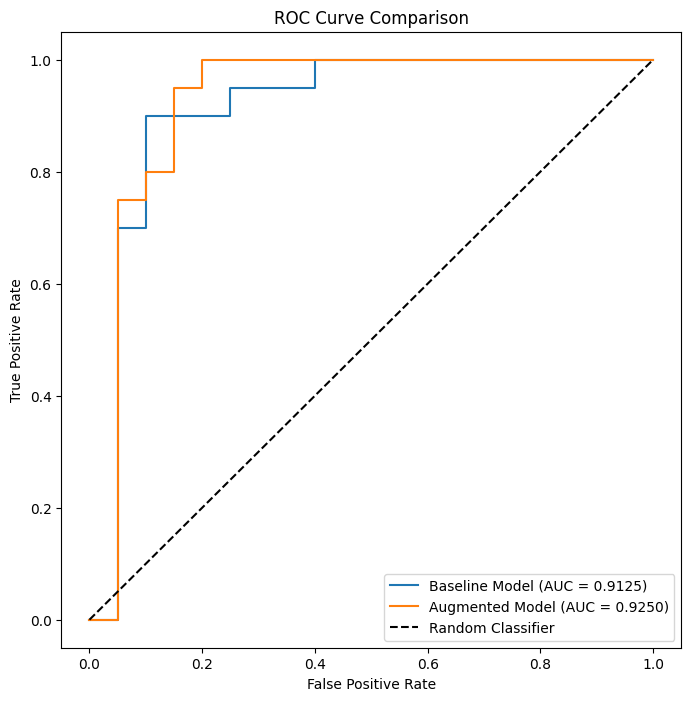

In [ ]:
plt.figure(figsize=(8, 8))

# Plot the ROC curve for the baseline model
plt.plot(fpr_baseline, tpr_baseline, label=f'Baseline Model (AUC = {roc_auc_baseline:.4f})')
# Plot the ROC curve for the augmented model
plt.plot(fpr_augmented, tpr_augmented, label=f'Augmented Model (AUC = {roc_auc_augmented:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

### Analysis:

*   The baseline ResNet50 model achieved an AUC of 0.9125 on the test dataset.
*   The augmented ResNet50 model achieved an AUC of 0.9250 on the test dataset.
*   The ROC curve for both models performed nearly the same , but the augmented model achieved slightly better performance.

 Learning curves for both models showed a significant gap between training and validation performance, suggesting potential overfitting on the training data or limitations in the frozen base models' ability to generalize to the validation set for this specific task. Since the AUC score and ROC curves were nearly the same for both models is is difficult to say which model is more robust, but with perhaps better data augmentation and fine tuning the models may perform differently.